<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [117]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



/tmp/ipython-input-715334544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plotting = sns.barplot(


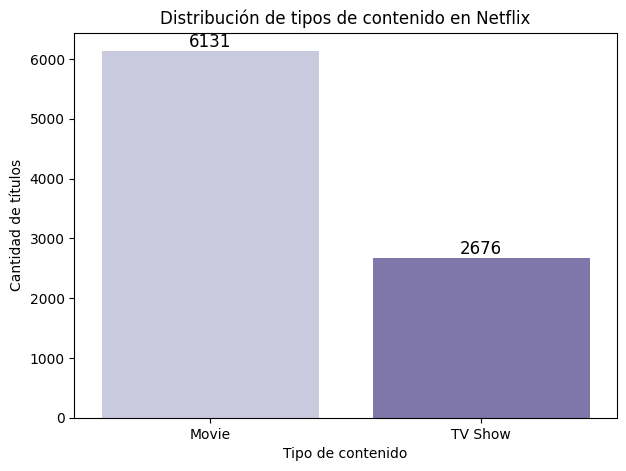

In [82]:
# 1. Distribución de tipos de contenido
# Usamos ST para decir que una entrada no tiene tipo
df.loc[df['type'].isnull(),'type'] = 'ST'
df.loc[(df['type']!='Movie') & (df['type']!='TV Show'), 'type'] = 'ST'

plt.style.use('default')
plt.figure(figsize=(7,5))
# sns.countplot(data=df, x="type", palette="pastel")
plotting = sns.barplot(
    x="type",
    y="count",
    data=df.groupby('type').size().reset_index(name='count'),
    palette="Purples",
    linewidth=3
)
for container in plotting.containers:
    plotting.bar_label(container,fontsize=12)

plt.title("Distribución de tipos de contenido en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad de títulos")
plt.show()

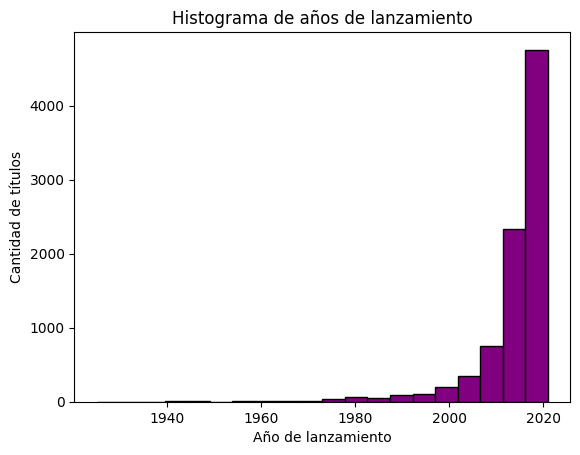

In [106]:
# 2. Histograma de contenidos
# Usamos 0 para decir que una entrada no tiene año de lanzamiento
df.loc[df['release_year'].isnull(),'release_year'] = 0
plt.hist(df['release_year'], bins=20, color='Purple', edgecolor='black')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de títulos')
plt.title('Histograma de años de lanzamiento')
plt.show()


/tmp/ipython-input-3180010646.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plotting = sns.countplot(


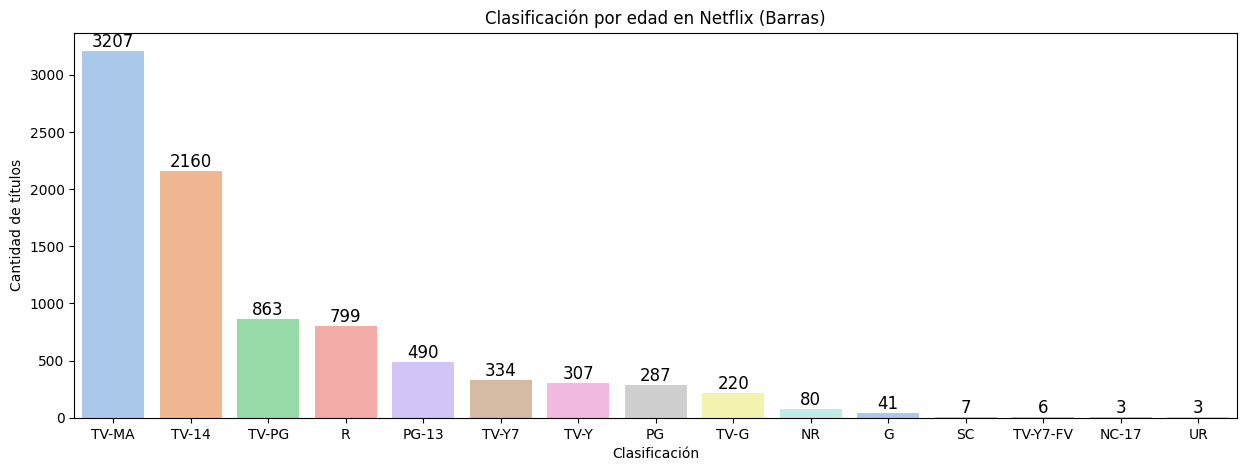

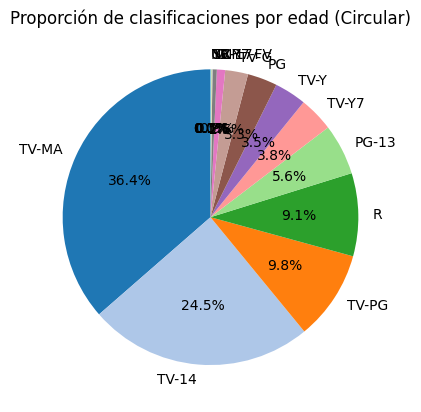

In [110]:
# 3. Proporción de clasificaciones por edad
# Usamos SR (Sin rating) para los casos de datos nulos
# o para los rating no coherentes (como 78 min)
df.loc[df['rating'].isnull(),'rating'] = 'SC'
df.loc[df['rating'].str.endswith('min'),'rating'] = 'SC'

# Gráfica de barras
plt.style.use('default')
plt.figure(figsize=(15,5))
plotting = sns.countplot(
    x="rating",
    data=df,
    order = df['rating'].value_counts().index,
    palette="pastel",
    linewidth=3
)
for container in plotting.containers:
    plotting.bar_label(container,fontsize=12)
plt.title("Clasificación por edad en Netflix (Barras)")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad de títulos")
plt.show()

# Gráfica circular
plt.figure()
df["rating"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, cmap="tab20"
)
plt.title("Proporción de clasificaciones por edad (Circular)")
plt.ylabel("")
plt.show()




## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


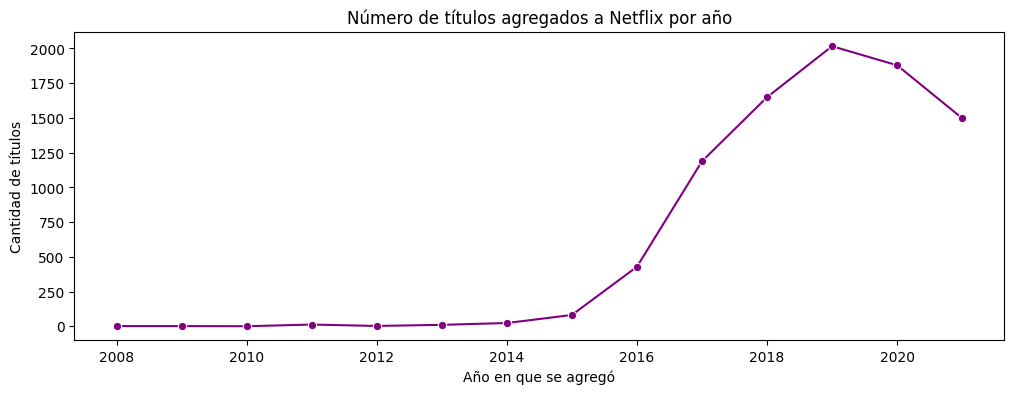

In [134]:
# 4. Número de títulos agregados por año
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year

titles_per_year = df["year_added"].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker="o", color="Purple")
plt.title("Número de títulos agregados a Netflix por año")
plt.xlabel("Año en que se agregó")
plt.ylabel("Cantidad de títulos")
plt.show()



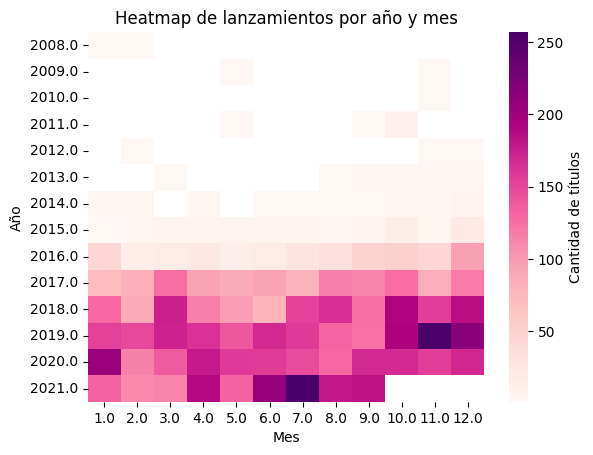

In [99]:
# 5. Heatmap de lanzamiento por año y mes
df["month_added"] = df["date_added"].dt.month
heatmap_data = df.pivot_table(index="year_added", columns="month_added",
                              values="show_id", aggfunc="count")

plt.figure()
sns.heatmap(heatmap_data, cmap="RdPu", annot=False, cbar_kws={'label': 'Cantidad de títulos'})
plt.title("Heatmap de lanzamientos por año y mes")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()


/tmp/ipython-input-4059387584.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_exploded, x="genre", y="duration_minutes", palette="PuRd")


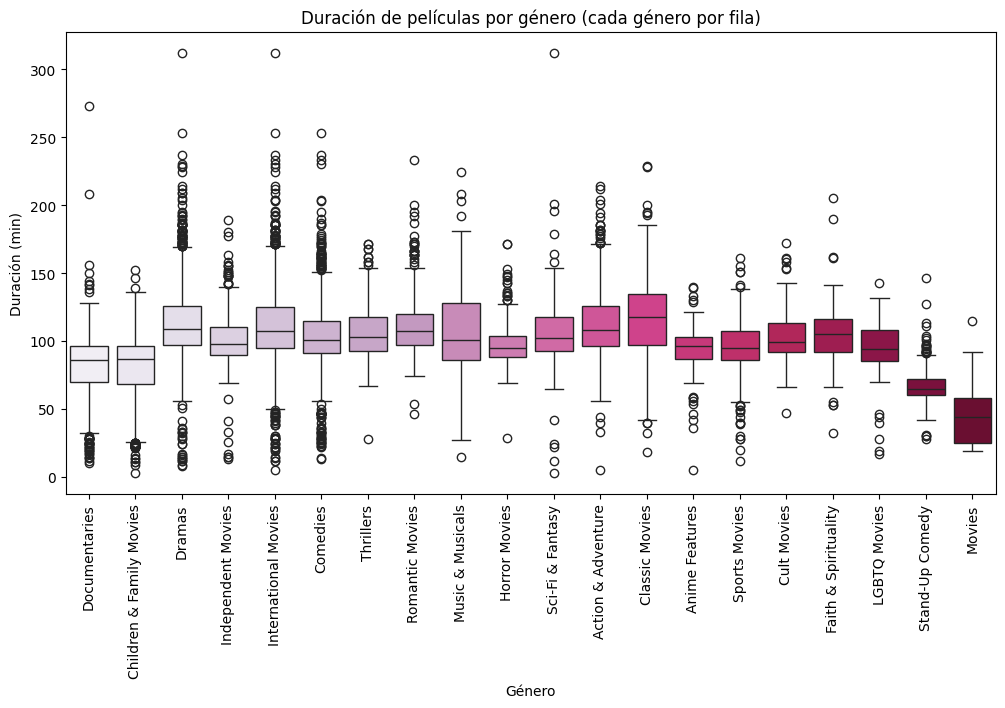

In [154]:
# 6. Duración de películas por género
movies = df[df["type"] == "Movie"].copy()
movies["duration_minutes"] = movies["duration"].str.replace(" min", "", regex=False)
movies["duration_minutes"] = pd.to_numeric(movies["duration_minutes"], errors="coerce")
movies["genre"] = movies["listed_in"].str.split(",").apply(lambda x: [g.strip() for g in x])
movies_exploded = movies.explode("genre").reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=movies_exploded, x="genre", y="duration_minutes", palette="PuRd")
plt.xticks(rotation=90)
plt.title("Duración de películas por género (cada género por fila)")
plt.xlabel("Género")
plt.ylabel("Duración (min)")
plt.show()



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-2348609395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="PuRd")


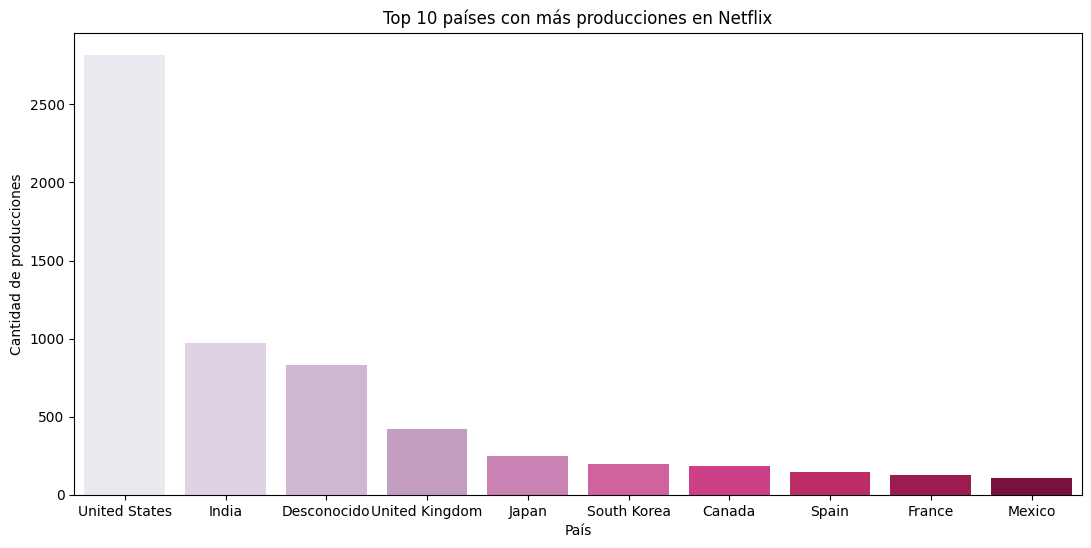

In [165]:
# 7. Top 10 países con más producciones
# Llamamos Desconocido cuando no hay país ingresado
df.loc[df['country'].isnull(),'country'] = 'Desconocido'

df_exploded = df.explode("country").reset_index(drop=True)
top_countries = df_exploded["country"].value_counts().head(10)
plt.figure(figsize=(13,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="PuRd")
plt.title("Top 10 países con más producciones en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de producciones")
plt.show()

/tmp/ipython-input-2114112326.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Tipo")


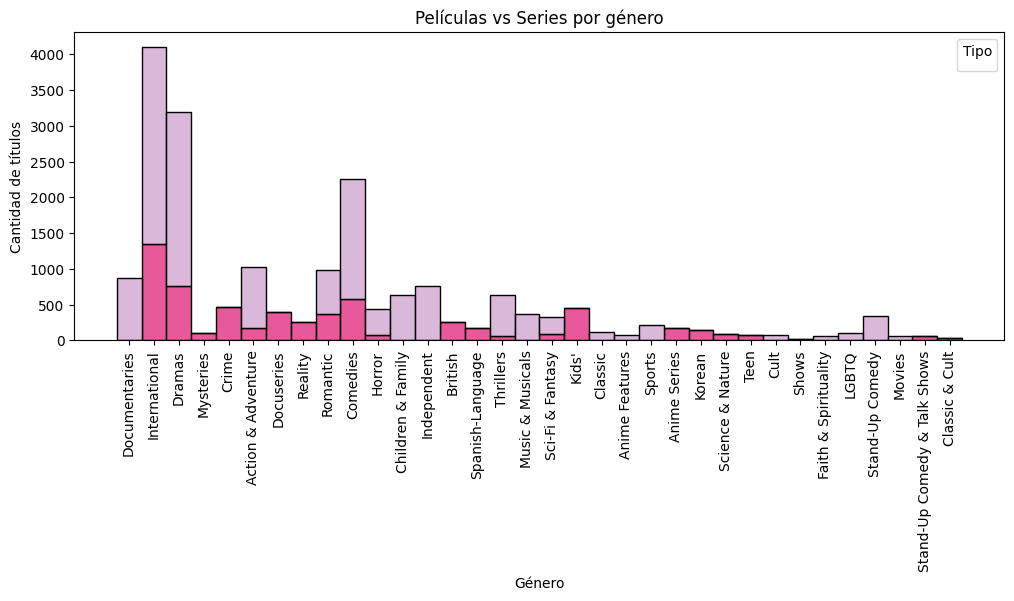

In [219]:
# 8. Películas vs Series según género
df_genres = df.copy()
df_genres["genre_list"] = df_genres["listed_in"].str.split(",").apply(lambda x: [g.strip() for g in x])
df_genres = df_genres.explode("genre_list").reset_index(drop=True)
df_genres["genre_list"] = df_genres["genre_list"].str.replace(r"\s*( TV Shows)|( TV)|( Movies)$", "", regex=True)
df_genres["genre_list"] = df_genres["genre_list"].str.replace(r"^(TV)\s+", "", regex=True)
genre_type_counts = df_genres.groupby(["genre_list", "type"]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 4))
sns.histplot(
    data = df_genres,
    x = 'genre_list',
    hue = 'type',
    multiple = 'stack',
    palette = 'PuRd'
)

plt.title("Películas vs Series por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=90)
plt.legend(title="Tipo")
plt.show()


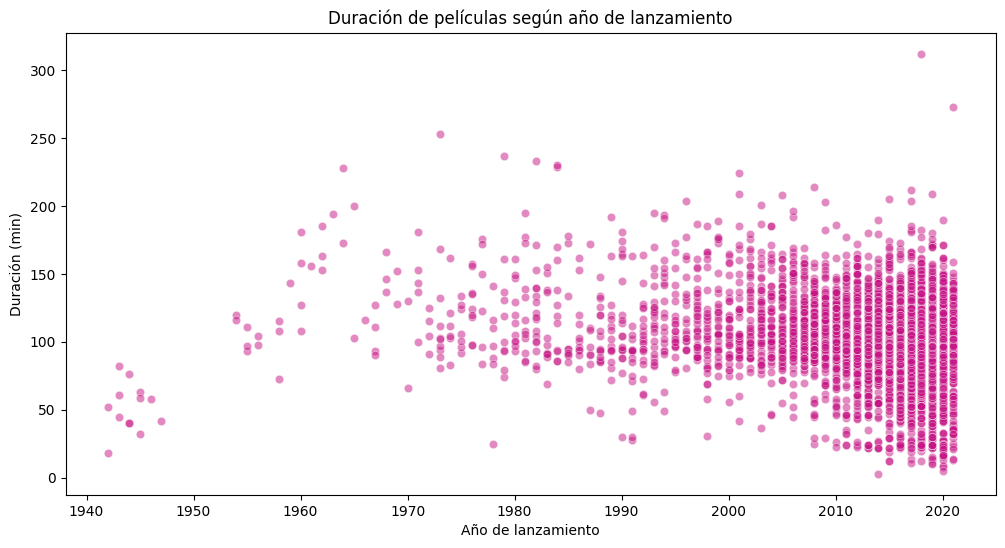

In [217]:
# 9. Relación entre duración y año de lanzamiento
# usamos el df movies hecho anteriormente

plt.figure(figsize=(12,6))
sns.scatterplot(data=movies, x="release_year", y="duration_minutes", alpha=0.5, color="mediumvioletred")
plt.title("Duración de películas según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (min)")
plt.show()


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

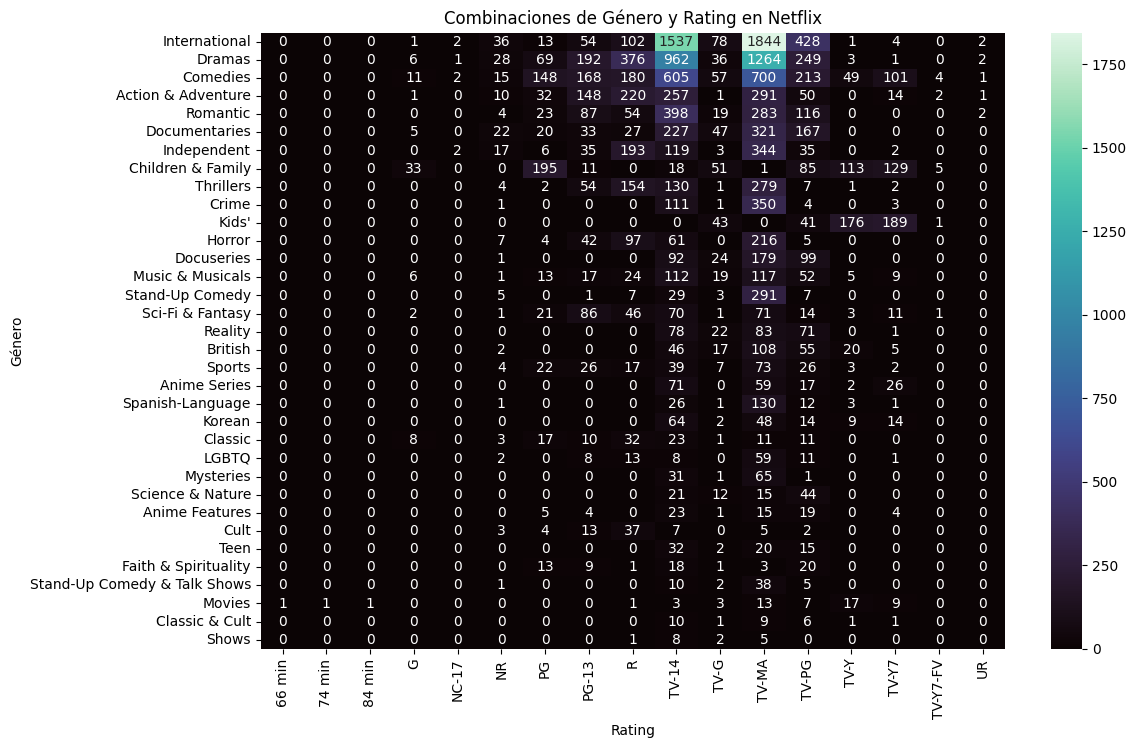

In [221]:
# Explode géneros si no lo has hecho
# usamos el df hecho anteriormente
genre_rating_counts = df_genres.groupby(["genre_list", "rating"]).size().unstack(fill_value=0)

genre_order = genre_rating_counts.sum(axis=1).sort_values(ascending=False).index
genre_rating_counts = genre_rating_counts.loc[genre_order]

plt.figure(figsize=(12,8))
sns.heatmap(genre_rating_counts, annot=True, fmt="d", cmap="mako")
plt.title("Combinaciones de Género y Rating en Netflix")
plt.xlabel("Rating")
plt.ylabel("Género")
plt.show()
